In [1]:
import xarray as xr
import numpy as np
import xmitgcm
from matplotlib import pyplot as plt
import os
from glob import glob
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (18,12)

In [3]:
import dask
from dask.diagnostics import ProgressBar
print(dask.__version__)
print(xr.__version__)

0.16.0
0.10.0


In [4]:
ddir = '/swot/SUM01/LLC/llc_4320_agulhas/'
all_files = sorted(glob(os.path.join(ddir, 'llc_4320_agulhas.0*.nc')))
print(len(all_files))
all_files[0], all_files[-1]

1752


('/swot/SUM01/LLC/llc_4320_agulhas/llc_4320_agulhas.0000010368.nc',
 '/swot/SUM01/LLC/llc_4320_agulhas/llc_4320_agulhas.0000262512.nc')

In [5]:
ds = xr.open_mfdataset(all_files[:24], decode_cf=False, autoclose=True, chunks={'k': 1, 'k_l': 1})
#ds = xr.open_dataset(all_files[], decode_cf=False, chunks={'k': 1, 'k_l': 1})
ds = ds.set_coords(['iter', 'face'])

In [6]:
grid_ds = xr.open_dataset(ddir + 'llc_4320_agulhas_grid.nc')
ds = xr.merge([grid_ds, ds])

In [8]:
import xmitgcm
ds = xmitgcm.mds_store._swap_dimensions(ds, geometry='sphericalpolar')

In [10]:
ds

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 2160, YG: 2160, Z: 90, Zl: 90, Zp1: 91, Zu: 90, time: 24)
Coordinates:
  * YC        (YC) float32 -57.001 -56.99 -56.9789 -56.9678 -56.9567 ...
  * YG        (YG) float32 -57.0066 -56.9955 -56.9844 -56.9733 -56.9623 ...
  * XC        (XC) float32 -15.4896 -15.4688 -15.4479 -15.4271 -15.4062 ...
  * XG        (XG) float32 -15.5 -15.4792 -15.4583 -15.4375 -15.4167 ...
  * Zp1       (Zp1) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Z         (Z) float32 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zl        (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Zu        (Zu) float32 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * time      (time) float64 2.592e+05 2.628e+05 2.664e+05 2.7e+05 2.736e+05 ...
Data variables:
    face      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    rA        (YC, XC) float32 ...
    rAw       (YC, XG) float32 ...
    rAs       (YG,

In [9]:
ds = ds.set_coords(list(grid_ds.variables))
ds

ValueError: One or more of the specified variables cannot be found in this dataset

In [13]:
ds

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 2160, YG: 2160, Z: 90, Zl: 90, Zp1: 91, Zu: 90, time: 24)
Coordinates:
  * YC        (YC) float32 -57.001 -56.99 -56.9789 -56.9678 -56.9567 ...
  * YG        (YG) float32 -57.0066 -56.9955 -56.9844 -56.9733 -56.9623 ...
  * XC        (XC) float32 -15.4896 -15.4688 -15.4479 -15.4271 -15.4062 ...
  * XG        (XG) float32 -15.5 -15.4792 -15.4583 -15.4375 -15.4167 ...
  * Zp1       (Zp1) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Z         (Z) float32 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zl        (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Zu        (Zu) float32 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * time      (time) float64 2.592e+05 2.628e+05 2.664e+05 2.7e+05 2.736e+05 ...
Data variables:
    face      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    rA        (YC, XC) float32 ...
    rAw       (YC, XG) float32 ...
    rAs       (YG,

In [9]:
sst = ds.Theta[0,0].where(ds.hFacC[0]>0).load()

In [10]:
sss = ds.Salt[0,0].where(ds.hFacC[0]>0).load()

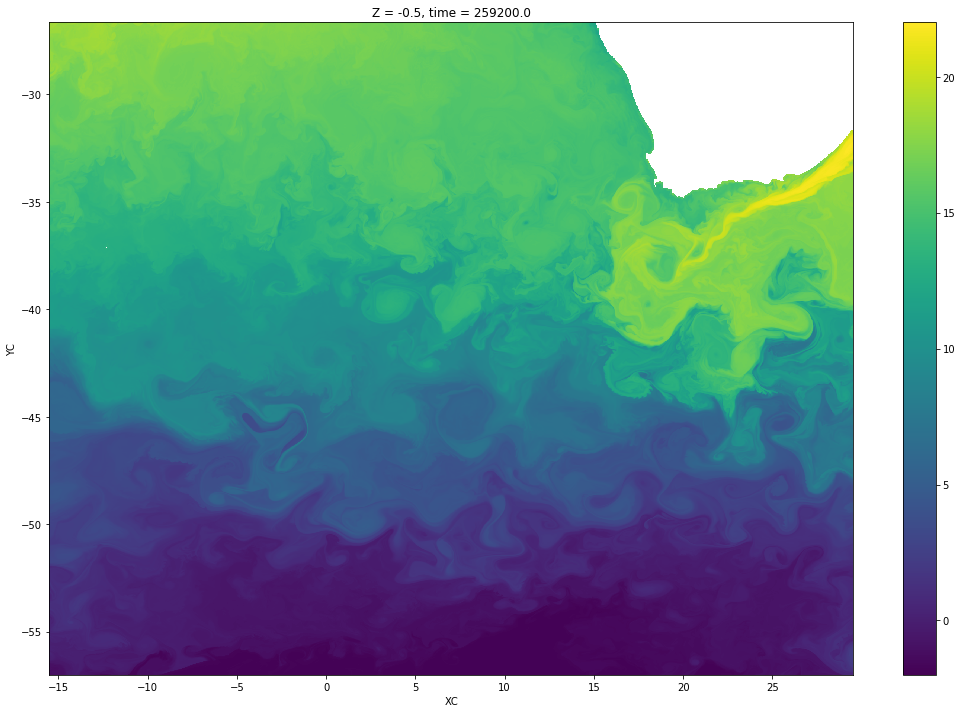

In [11]:
plt.figure(figsize=(18,12))
sst.plot(vmin=-2, vmax=22)

In [11]:
from xgcm import Grid
grid = Grid(ds, periodic=False)
grid

<xgcm.Grid>
T Axis (not periodic):
  * center   time (24)
Y Axis (not periodic):
  * center   YC (2160) --> left
  * left     YG (2160) --> center
Z Axis (not periodic):
  * center   Z (90) --> left
  * right    Zl (90) --> center
  * outer    Zp1 (91) --> center
  * left     Zu (90) --> center
X Axis (not periodic):
  * center   XC (2160) --> left
  * left     XG (2160) --> center

In [36]:
def geostrophic_vel(ds):

    d_eta_dx = grid.diff(ds.Eta, 'X', boundary='extend') * ds.hFacW[0] / ds.dxC
    d_eta_dy = grid.diff(ds.Eta, 'Y', boundary='extend') * ds.hFacS[0] / ds.dyC

    Om = 7.2921e-5
    g = 9.81
    f_g = 2 * Om * np.sin(np.deg2rad(ds.YG))
    f_c = 2 * Om * np.sin(np.deg2rad(ds.YC))

    u_g = - g * d_eta_dy * f_g**-1
    v_g = g * d_eta_dx *f_c**-1
    
    return u_g, v_g

In [38]:
u_g_hourly, v_g_hourly = geostrophic_vel(ds)
ds_daily = ds.mean(dim='time')
u_g_daily, v_g_daily = geostrophic_vel(ds_daily)

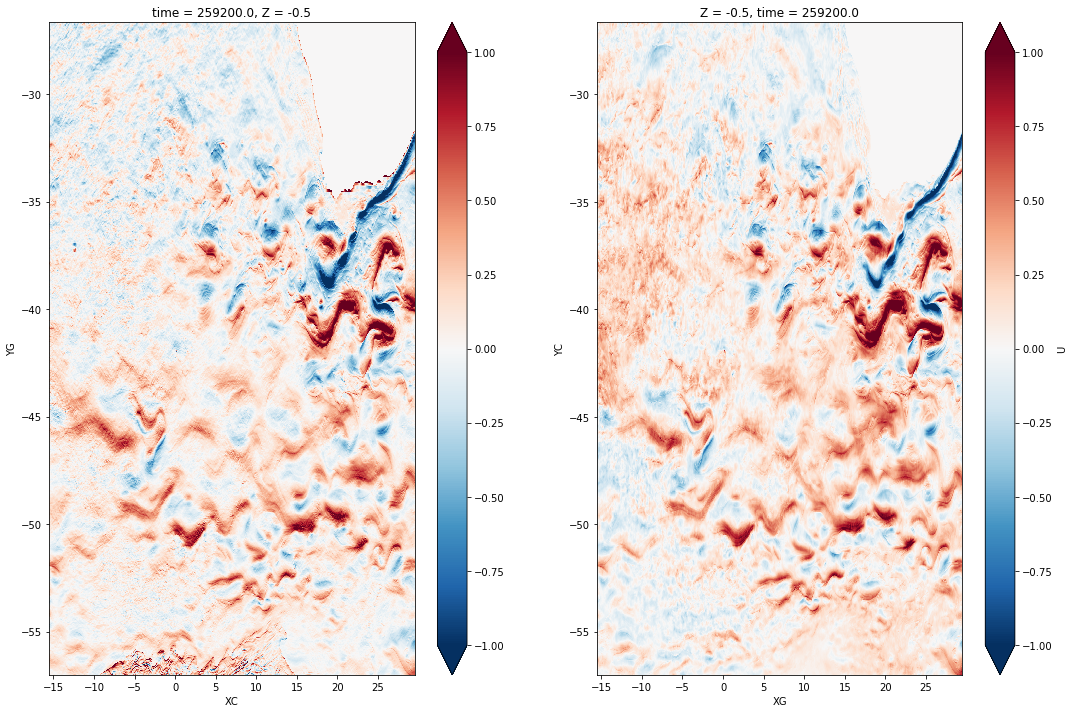

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2) 
u_g_hourly[0].plot(vmax=1, ax=ax1)
ds.U[0,0].plot(vmax=1, ax=ax2)

[########################################] | 100% Completed | 10.7s
[########################################] | 100% Completed |  2.5s
[########################################] | 100% Completed | 27.5s
[########################################] | 100% Completed | 25.2s


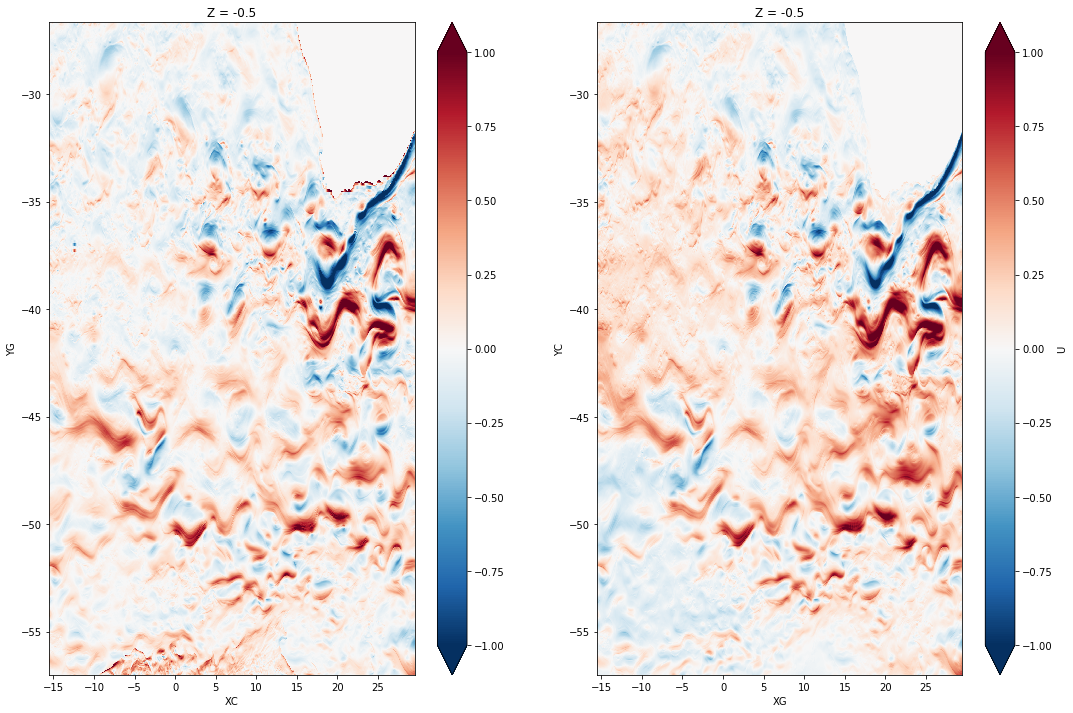

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
with ProgressBar():
    u_g_daily.plot(vmax=1, ax=ax1)
    ds_daily.U[0].plot(vmax=1, ax=ax2)